# Importing All The Necessary Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ignore all warnings
warnings.filterwarnings('ignore')

C:\Users\WenJIE\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\WenJIE\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Data Understanding

In [2]:
data_kajang=pd.read_csv("comprehensive_income_2023_kajang.csv")
data_kajang

,MONTH,SALES,STOCKS _AT_THE_BEGINNIN,PURCHASE,PURCHASE_PACKAGING,PURCHASE_RETURNED,STOCKS_AT_THE_END,BANK_INTEREST,ADVERTISEMENT,BANK_CHARGES,...,MARKETING_PROMOTION,TRANSPORT_FEES,LICENSE_FEE,RENTAL_DISH_WASHING_MECHINE,SECRETARY_FEES,STAFF_TRAINING,HANDLING_FEES,TAX_FEES,TERM_LOAN_INTEREST,NET_PROFIT
0,31/01/2023,218477.69,21910.11,101776.25,931.15,-120.00,-22205.26,36.58,2116.81,5.1,...,0.0,2410,0.00,600,70,255.00,5520.40,116.67,317.76,15154.10
1,28/02/2023,170902.59,22205.26,73628.02,803.70,0.00,-18975.15,43.47,144.11,3.7,...,0.0,1570,0.00,600,70,0.00,5030.87,116.67,0.00,675.91
2,31/03/2023,163609.58,18975.15,68409.02,814.65,-105.00,-20884.15,9.58,2331.66,5.3,...,78.2,2100,0.00,600,420,50.00,6867.11,116.67,0.00,-13554.99
3,30/04/2023,123528.49,20884.15,55587.28,958.00,0.00,-20102.80,24.17,2446.05,3.8,...,0.0,1460,0.00,600,70,160.00,5039.76,116.67,0.00,-4570.70
4,31/05/2023,196086.32,20102.80,82334.59,476.00,0.00,-16524.28,51.20,286.84,4.8,...,6263.0,1960,0.00,600,70,0.00,5054.09,116.67,0.00,18448.49
5,30/06/2023,185346.89,16524.28,83916.88,752.35,0.00,-18818.52,11.25,69.51,3.2,...,448.0,1728,200.00,600,70,108.00,5308.32,116.67,0.00,12590.05
6,31/07/2023,199081.13,18818.52,82963.51,582.15,0.00,-19883.37,34.66,3887.47,30.1,...,3284.0,1750,0.00,600,70,108.00,5322.88,116.67,35681.32,-34821.48
7,31/08/2023,189866.79,19883.37,93912.96,491.30,0.00,-15560.21,9.84,1197.42,3.7,...,2284.0,1750,0.00,600,70,0.00,5244.74,116.67,0.00,2523.06
8,30/09/2023,182756.13,15560.21,74778.00,533.05,-70.00,-19053.68,31.15,1545.30,4.6,...,3510.0,2086,641.00,600,70,678.41,4689.53,328.67,0.00,28069.34
9,31/10/2023,178061.18,19053.68,64996.72,798.80,-13555.32,-16008.13,25.37,780.87,4.1,...,2345.0,2000,34.25,600,490,0.00,4724.37,200.63,33365.65,485.51


In [3]:
# Check total number of attributes
print("No. of Attributes (Columns): ",len(data_kajang.columns))
print("No. of sample (Rows): ",len(data_kajang))

No. of Attributes (Columns):  64
No. of sample (Rows):  12


In [4]:
# Data info
data_kajang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MONTH                          12 non-null     object 
 1   SALES                          12 non-null     float64
 2   STOCKS _AT_THE_BEGINNIN        12 non-null     float64
 3   PURCHASE                       12 non-null     float64
 4   PURCHASE_PACKAGING             12 non-null     float64
 5   PURCHASE_RETURNED              12 non-null     float64
 6   STOCKS_AT_THE_END              12 non-null     float64
 7   BANK_INTEREST                  12 non-null     float64
 8   ADVERTISEMENT                  12 non-null     float64
 9   BANK_CHARGES                   12 non-null     float64
 10  CONSUMABLE                     12 non-null     float64
 11  SALARIES                       12 non-null     float64
 12  TRAVELLING_EXPENSES            12 non-null     float

In [5]:
# Checking missing values
data_kajang.isnull().sum()

MONTH                      0
SALES                      0
STOCKS _AT_THE_BEGINNIN    0
PURCHASE                   0
PURCHASE_PACKAGING         0
                          ..
STAFF_TRAINING             0
HANDLING_FEES              0
TAX_FEES                   0
TERM_LOAN_INTEREST         0
NET_PROFIT                 0
Length: 64, dtype: int64

In [6]:
#Checking Duplicate Data
data_kajang.duplicated().sum()

0

In [7]:
# Data describe
data_kajang.describe().T

,count,mean,std,min,25%,50%,75%,max
SALES,12.0,183289.229167,24570.605311,123528.49,176271.5325,184051.510,196835.0225,218477.69
STOCKS _AT_THE_BEGINNIN,12.0,18930.270833,2221.501776,15560.21,17059.2625,19014.415,20298.1375,22205.26
PURCHASE,12.0,77444.811667,12565.925825,55587.28,70515.8825,75297.170,83201.8525,101776.25
PURCHASE_PACKAGING,12.0,715.470833,168.520961,476.00,569.8750,775.575,818.0000,958.00
PURCHASE_RETURNED,12.0,-1157.110000,3904.675608,-13555.32,-78.7500,0.000,0.0000,0.00
...,...,...,...,...,...,...,...,...
STAFF_TRAINING,12.0,135.099167,191.165535,0.00,0.0000,84.000,170.4450,678.41
HANDLING_FEES,12.0,5417.668333,664.130525,4689.53,5037.5375,5276.530,5568.2400,6867.11
TAX_FEES,12.0,141.326667,63.745139,116.63,116.6700,116.670,116.6700,328.67
TERM_LOAN_INTEREST,12.0,7148.330000,22084.019974,-33365.65,0.0000,0.000,8579.7325,49780.88


# Data Cleaning

In [8]:
# Group the column 
data_kajang['COST_OF_GOODS'] =(
    data_kajang['STOCKS _AT_THE_BEGINNIN'] + data_kajang['PURCHASE'] + 
    data_kajang['PURCHASE_PACKAGING'] + data_kajang['PURCHASE_RETURNED'] + data_kajang['STOCKS_AT_THE_END']
)

data_kajang['CO_SEC_FEE'] = (
    data_kajang['FILING_FEES'] + data_kajang['SECRETARY_FEES'] + data_kajang['AUDIT_FEES'] +
    data_kajang['TAX_FEES'] + data_kajang['CONSULTANCY_PROFESSIONAL_FEES'] + 
    data_kajang['BRANDING_FEE'] + data_kajang['LICENSE_FEE'] + data_kajang['HANDLING_FEES'] +
    data_kajang['SUBSCRIPTION_FEES']
)

data_kajang['SOCIAL_SECURITY_FEE'] = (
    data_kajang['EIS_EMPLOYER'] + data_kajang['SOCSO_EMPLOYER'] + data_kajang['EPF_EMPLOYER']
)

data_kajang['FIX_FEE'] = (
    data_kajang['RENTAL_DISH_WASHING_MECHINE'] + data_kajang['RENTAL_HOSTEL'] +
    data_kajang['INTEREST_EXPENSES'] + data_kajang['DIRECTOR_FEES'] +
    data_kajang['TELEPHONE_FAX_CHARGES'] + data_kajang['PEST_CONTROL'] +
    data_kajang['CREDIT_CARD_CHARGES'] + data_kajang['DEPRECIATION_OF_FIXED_ASSETS']
)

data_kajang['STAFF_EXPENSES'] = (
    data_kajang['TRAVELLING_EXPENSES'] + data_kajang['MEDICAL_STAFF'] +
    data_kajang['STAFF_WELFARE'] + data_kajang['PETROL_TOLL_PARKING'] +
    data_kajang['STAFF_AMENITIES'] + data_kajang['STAFF_MEAL'] +
    data_kajang['STAFF_TRAINING'] + data_kajang['FOREIGN_WORKER_EXPENSES']+
    data_kajang['UPKEEP_OF_HOSTEL']
)

data_kajang['MISCELLANEOUS_FEES'] = (
    data_kajang['BANK_CHARGES'] + data_kajang['POSTAGE'] + data_kajang['PRINTING_SATTIONERY'] +
    data_kajang['SERVICE_CHARGES']
)


data_kajang['SHOP_EXPENSES'] = (
    data_kajang['TRANSPORT_FEES'] + data_kajang['MARKETING_PROMOTION'] + 
    data_kajang['CONSUMABLE'] + data_kajang['ADVERTISEMENT'] + 
    data_kajang['INSURANCE'] + data_kajang['SMALL_ASSETS']+
    data_kajang['KITCHEN_UTENSIL'] + data_kajang['GAS_FLUID']+ 
    data_kajang['TERM_LOAN_INTEREST']+ data_kajang['RENTAL_PREMISES']+ data_kajang['QUIT_RENT_ASSESSMENT']+
    data_kajang['UPKEEP_OF_EQUIPMENT'] + data_kajang['UPKEEP_OF_SHOP']

)

data_kajang['WATER_BILL']=( data_kajang['WATER_SHOP']+ data_kajang['WATER_HOSTEL'])


data_kajang['ELECTRIC_BILL']=( data_kajang['ELECTRICITY_SHOP']+ data_kajang['ELECTRICITY_HOSTEL'])

data_kajang['TOT_SALES']=( data_kajang['SALES']+ data_kajang['BANK_INTEREST'])

data_kajang['TOT_SALARIES']=( data_kajang['SALARIES']+ data_kajang['WAGES'] + 
                             data_kajang['EX_GRATIA'] + data_kajang['OVER_TIME']+
                             data_kajang['SUB_CON_WAGES']) 


# Drop the used columns
columns_to_drop = [
    'STOCKS _AT_THE_BEGINNIN', 'PURCHASE', 'PURCHASE_PACKAGING', 'PURCHASE_RETURNED', 'STOCKS_AT_THE_END',
    'FILING_FEES', 'SECRETARY_FEES', 'AUDIT_FEES', 'TAX_FEES', 
    'CONSULTANCY_PROFESSIONAL_FEES', 'BRANDING_FEE', 'LICENSE_FEE', 
    'HANDLING_FEES', 'SUBSCRIPTION_FEES', 'EIS_EMPLOYER', 'SOCSO_EMPLOYER', 
    'EPF_EMPLOYER', 'RENTAL_DISH_WASHING_MECHINE', 'RENTAL_HOSTEL', 
    'INTEREST_EXPENSES', 'DIRECTOR_FEES', 'TELEPHONE_FAX_CHARGES', 
    'PEST_CONTROL', 'CREDIT_CARD_CHARGES', 'TRAVELLING_EXPENSES', 
    'MEDICAL_STAFF', 'STAFF_WELFARE', 'PETROL_TOLL_PARKING', 'STAFF_AMENITIES', 
    'STAFF_MEAL', 'STAFF_TRAINING', 'BANK_CHARGES', 'POSTAGE', 
    'UPKEEP_OF_EQUIPMENT', 'UPKEEP_OF_SHOP', 'UPKEEP_OF_HOSTEL','PRINTING_SATTIONERY',
    'KITCHEN_UTENSIL', 'GAS_FLUID','TRANSPORT_FEES', 'MARKETING_PROMOTION', 
    'CONSUMABLE', 'ADVERTISEMENT', 'INSURANCE', 'SMALL_ASSETS', 'WATER_SHOP',
    'WATER_HOSTEL','ELECTRICITY_SHOP','ELECTRICITY_HOSTEL',
    'SALES','BANK_INTEREST','EX_GRATIA','SALARIES','WAGES','SERVICE_CHARGES',
    'OVER_TIME','TERM_LOAN_INTEREST','QUIT_RENT_ASSESSMENT','RENTAL_PREMISES','SUB_CON_WAGES',
    'DEPRECIATION_OF_FIXED_ASSETS','FOREIGN_WORKER_EXPENSES','NET_PROFIT'
]

data_kajang.drop(columns=columns_to_drop, inplace=True)


# Display the first few rows to confirm the changes
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data_kajang)

         MONTH  COST_OF_GOODS  CO_SEC_FEE  SOCIAL_SECURITY_FEE   FIX_FEE  \
0   31/01/2023      102292.25    16547.32              1081.20  13627.82   
1   28/02/2023       77661.83    12551.90              1091.95  13262.29   
2   31/03/2023       67209.67    14798.90              1156.45  16943.08   
3   30/04/2023       57326.63     9566.72              1375.60  13372.21   
4   31/05/2023       86389.11    13848.82              1360.35  12893.13   
5   30/06/2023       82374.99    13835.75              1274.95  13978.64   
6   31/07/2023       82480.81    14200.60              1297.15  19023.82   
7   31/08/2023       98727.42    13658.76              1107.00  14055.12   
8   30/09/2023       71747.58    13728.07               819.05  13993.26   
9   31/10/2023       55285.75    13973.36              1029.50  19988.38   
10  30/11/2023       70781.76    14638.23              1057.55  13992.42   
11  31/12/2023       80394.97    17895.49               991.35  14240.11   

    STAFF_E

In [9]:
data_kajang = data_kajang.drop(columns=["MONTH"])

In [10]:
data_kajang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COST_OF_GOODS        12 non-null     float64
 1   CO_SEC_FEE           12 non-null     float64
 2   SOCIAL_SECURITY_FEE  12 non-null     float64
 3   FIX_FEE              12 non-null     float64
 4   STAFF_EXPENSES       12 non-null     float64
 5   MISCELLANEOUS_FEES   12 non-null     float64
 6   SHOP_EXPENSES        12 non-null     float64
 7   WATER_BILL           12 non-null     float64
 8   ELECTRIC_BILL        12 non-null     float64
 9   TOT_SALES            12 non-null     float64
 10  TOT_SALARIES         12 non-null     float64
dtypes: float64(11)
memory usage: 1.2 KB


# EDA (Exploratory Data Analysis)

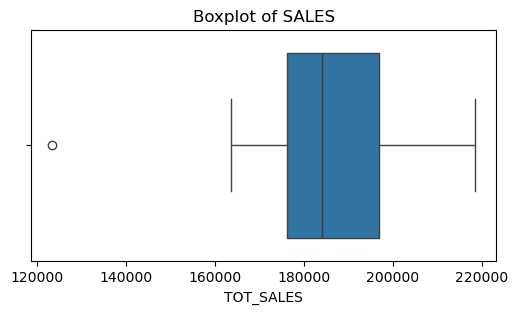

In [11]:
# Create a boxplot for the 'SALES' column
plt.figure(figsize=(6, 3))
sns.boxplot(x=data_kajang['TOT_SALES'])
plt.title('Boxplot of SALES')
plt.xlabel('TOT_SALES')
plt.show()

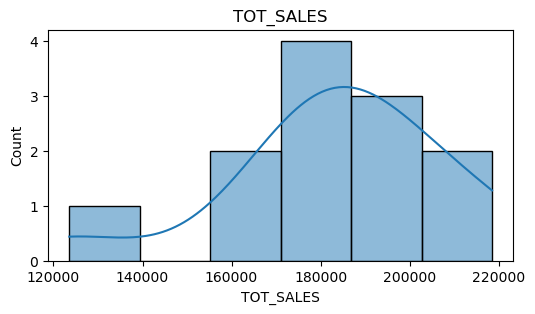

In [12]:
# Plotting the histogram for 'TOT_SALES' column
plt.figure(figsize=(6, 3))
sns.histplot(data_kajang['TOT_SALES'], kde=True)
plt.title('TOT_SALES')
plt.show()

In [13]:
if (data_kajang['TOT_SALES'] <= 0).any():
    # If there are zero or negative values, add a constant to handle it
    data_kajang['TOT_SALES'] = data_kajang['TOT_SALES'] + 1

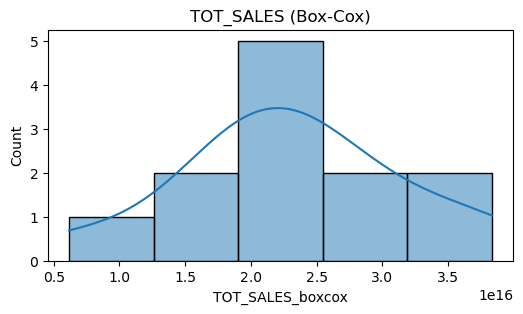

In [14]:
data_kajang['TOT_SALES_boxcox'], lambda_ = stats.boxcox(data_kajang['TOT_SALES'])

# Plotting the histogram for 'TOT_SALES' column after Box-Cox transformation
plt.figure(figsize=(6, 3))
sns.histplot(data_kajang['TOT_SALES_boxcox'], kde=True)
plt.title('TOT_SALES (Box-Cox)')
plt.show()

In [15]:
data_kajang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   COST_OF_GOODS        12 non-null     float64
 1   CO_SEC_FEE           12 non-null     float64
 2   SOCIAL_SECURITY_FEE  12 non-null     float64
 3   FIX_FEE              12 non-null     float64
 4   STAFF_EXPENSES       12 non-null     float64
 5   MISCELLANEOUS_FEES   12 non-null     float64
 6   SHOP_EXPENSES        12 non-null     float64
 7   WATER_BILL           12 non-null     float64
 8   ELECTRIC_BILL        12 non-null     float64
 9   TOT_SALES            12 non-null     float64
 10  TOT_SALARIES         12 non-null     float64
 11  TOT_SALES_boxcox     12 non-null     float64
dtypes: float64(12)
memory usage: 1.2 KB


In [16]:
# Display the 'TOT_SALES' and 'TOT_SALES_boxcox' columns
data_kajang[['TOT_SALES', 'TOT_SALES_boxcox']]

,TOT_SALES,TOT_SALES_boxcox
0,218514.27,3.834313e+16
1,170946.06,1.747632e+16
2,163619.16,1.519012e+16
3,123552.66,6.182439e+15
4,196137.52,2.713462e+16
5,185358.14,2.264410e+16
6,199115.79,2.847548e+16
7,189876.63,2.445861e+16
8,182787.28,2.165419e+16
9,178086.55,1.992182e+16


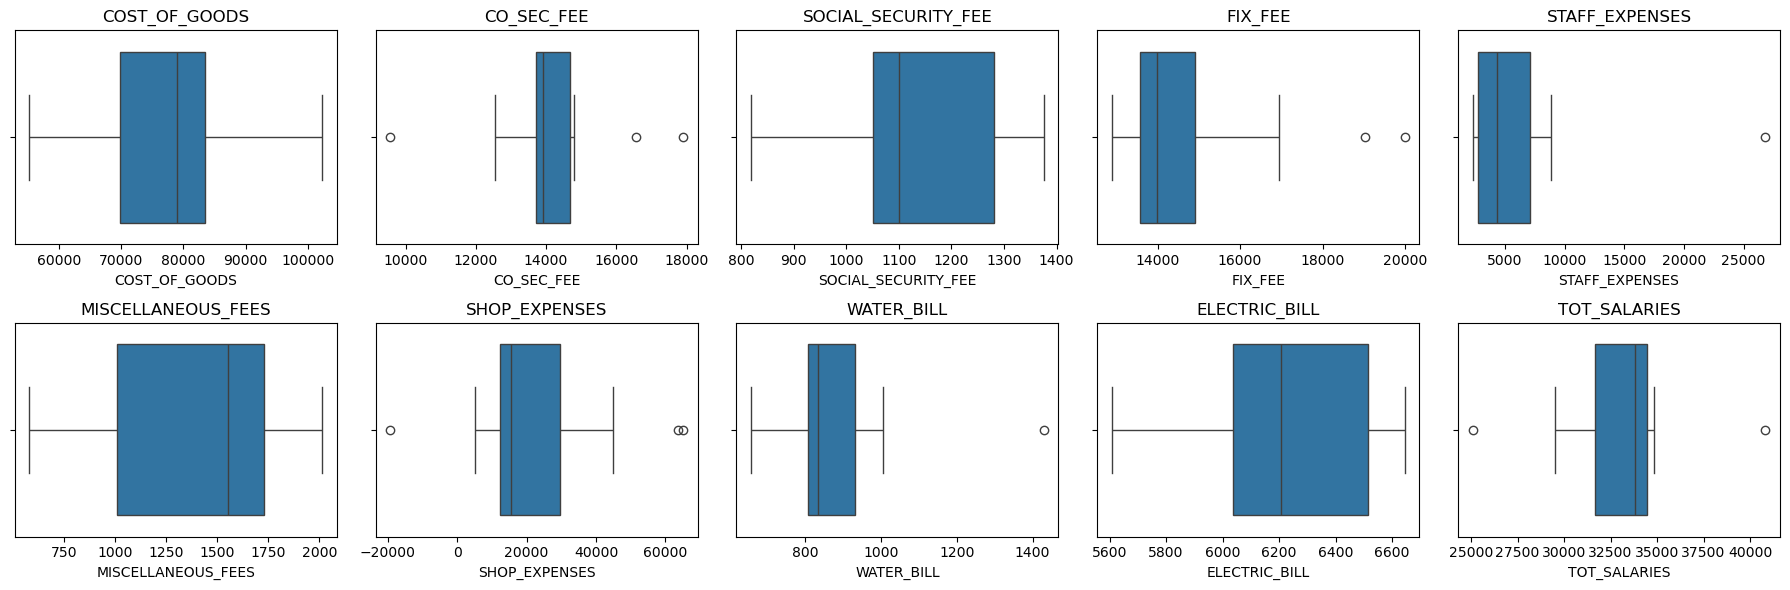

In [17]:
# Assuming data_kajang is your DataFrame, and columns is the list of column names you want to plot
columns = ['COST_OF_GOODS', 'CO_SEC_FEE', 'SOCIAL_SECURITY_FEE', 'FIX_FEE', 'STAFF_EXPENSES', 'MISCELLANEOUS_FEES',
           'SHOP_EXPENSES', 'WATER_BILL', 'ELECTRIC_BILL', 'TOT_SALARIES']

# Create a 2x6 grid of plots
fig, axes = plt.subplots(2, 5, figsize=(18, 6))

# Plot all subplots
for i, column in enumerate(columns):
    row = i // 5  # Determine the row index
    col = i % 5  # Determine the column index
    sns.boxplot(x=data_kajang[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

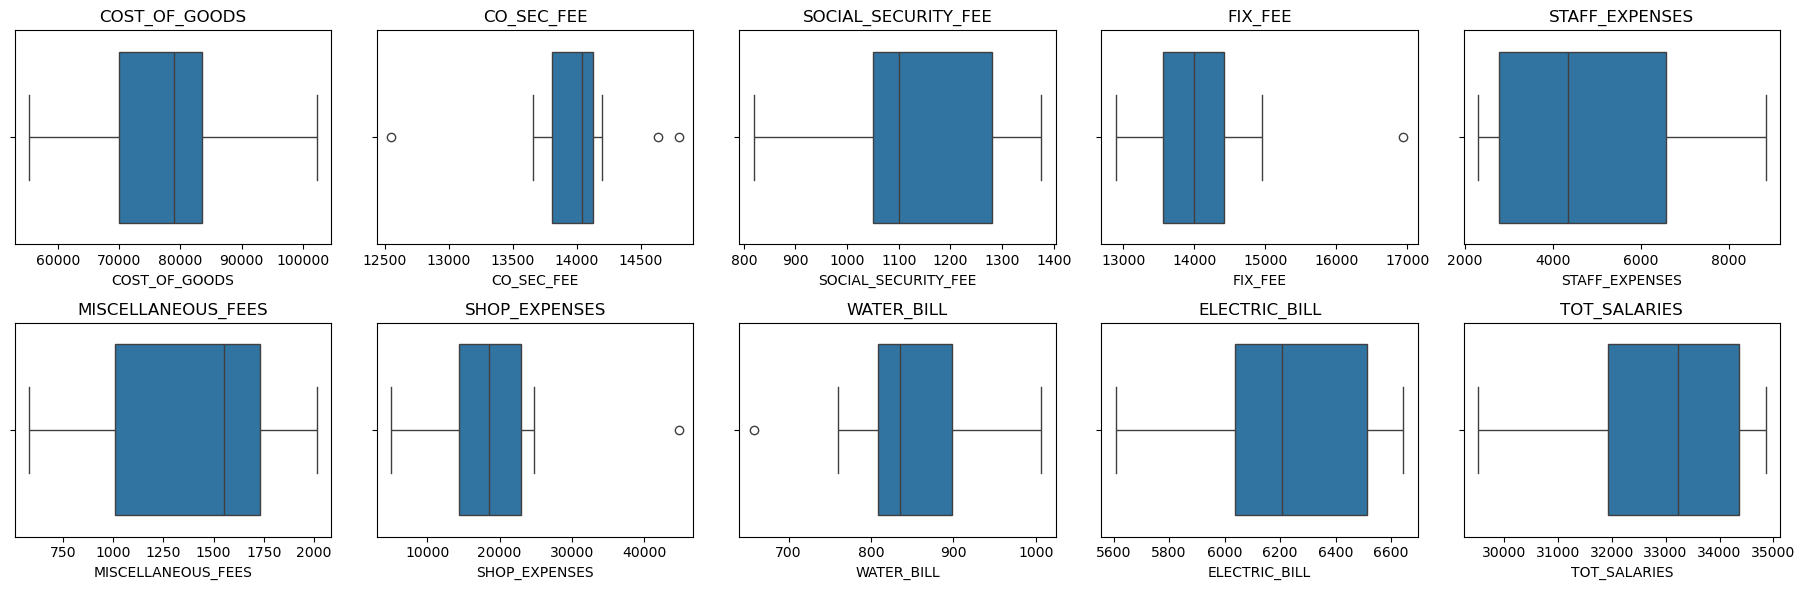

In [18]:
# Assuming data_kajang is your DataFrame and columns is the list of column names you want to process and plot
columns = ['COST_OF_GOODS', 'CO_SEC_FEE', 'SOCIAL_SECURITY_FEE', 'FIX_FEE', 'STAFF_EXPENSES', 'MISCELLANEOUS_FEES',
           'SHOP_EXPENSES', 'WATER_BILL', 'ELECTRIC_BILL', 'TOT_SALARIES']

# Function to replace outliers with the mean
def replace_outliers_with_mean(data, column):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean_value = data[column].mean()
        median_value = data[column].median()
        mode_value = data[column].mode()[0]
        data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = mean_value
        #data_kajang[columns] = data_kajang[columns].mask((data_kajang[columns] < lower_bound) | (data_kajang[columns] > upper_bound)).ffill().bfill()
        #data_kajang[columns] = data_kajang[columns].mask((data_kajang[columns] < lower_bound) | (data_kajang[columns] > upper_bound)).interpolate()

# Replace outliers in each column
for column in columns:
    replace_outliers_with_mean(data_kajang, column)

# Create a 2x6 grid of plots
fig, axes = plt.subplots(2, 5, figsize=(18, 6))

# Plot all subplots
for i, column in enumerate(columns):
    row = i // 5  # Determine the row index
    col = i % 5  # Determine the column index
    sns.boxplot(x=data_kajang[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

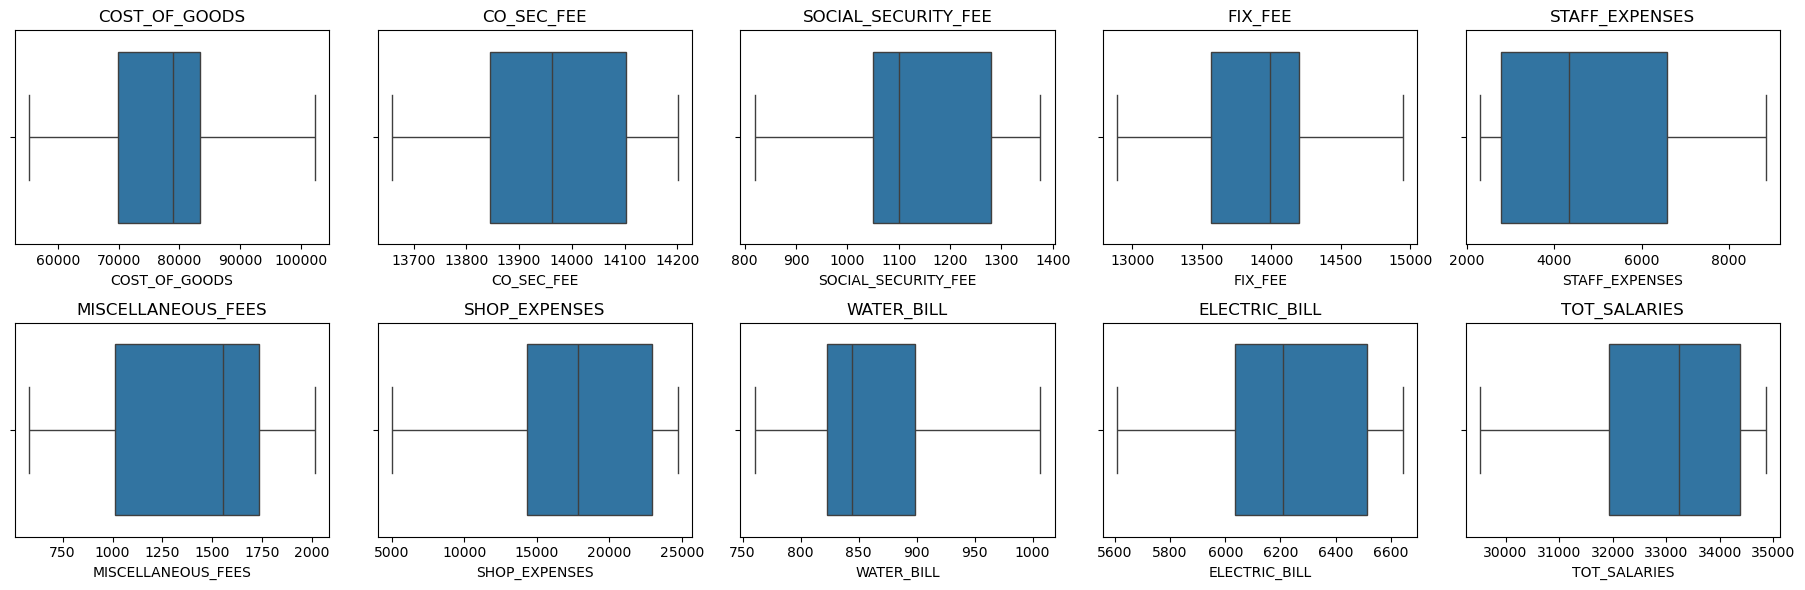

In [19]:
# Assuming data_kajang is your DataFrame, columns is the list of columns you want to process and plot
columns = ['COST_OF_GOODS', 'CO_SEC_FEE', 'SOCIAL_SECURITY_FEE', 'FIX_FEE', 'STAFF_EXPENSES', 'MISCELLANEOUS_FEES',
           'SHOP_EXPENSES', 'WATER_BILL', 'ELECTRIC_BILL', 'TOT_SALARIES']

# Function to replace outliers with the mean
def replace_outliers_with_mean(data, column):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mean_value = data[column].mean()
        median_value = data[column].median()
        mode_value = data[column].mode()[0]
        data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = mean_value
        #data_kajang[columns] = data_kajang[columns].mask((data_kajang[columns] < lower_bound) | (data_kajang[columns] > upper_bound)).ffill().bfill()
        #data_kajang[columns] = data_kajang[columns].mask((data_kajang[columns] < lower_bound) | (data_kajang[columns] > upper_bound)).interpolate()

# Replace outliers in each column
for column in columns:
    replace_outliers_with_mean(data_kajang, column)

# Create a 2x5 plot layout
fig, axes = plt.subplots(2, 5, figsize=(18, 6))

# Display all subplots
for i, column in enumerate(columns):
    row = i // 5  # Determine row index
    col = i % 5  # Determine column index
    sns.boxplot(x=data_kajang[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

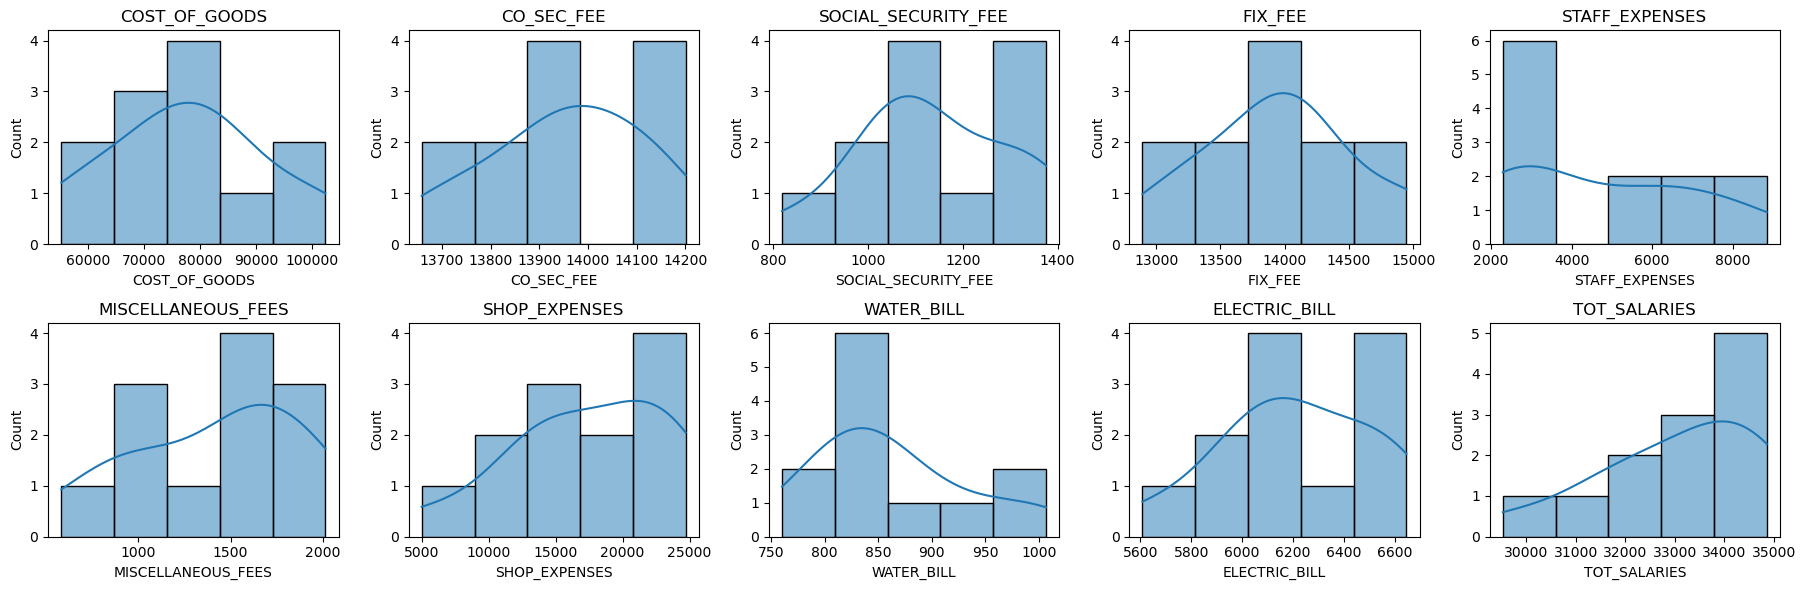

In [20]:
# Assuming data_kajang is your DataFrame and columns is the list of column names you want to plot
columns = ['COST_OF_GOODS', 'CO_SEC_FEE', 'SOCIAL_SECURITY_FEE', 'FIX_FEE', 'STAFF_EXPENSES', 'MISCELLANEOUS_FEES',
           'SHOP_EXPENSES', 'WATER_BILL', 'ELECTRIC_BILL', 'TOT_SALARIES']

# Create a 2x6 grid of plots
fig, axes = plt.subplots(2, 5, figsize=(18, 6))

# Plot all subplots
for i, column in enumerate(columns):
    row = i // 5  # Determine the row index
    col = i % 5  # Determine the column index
    sns.histplot(data_kajang[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(column)

# # Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

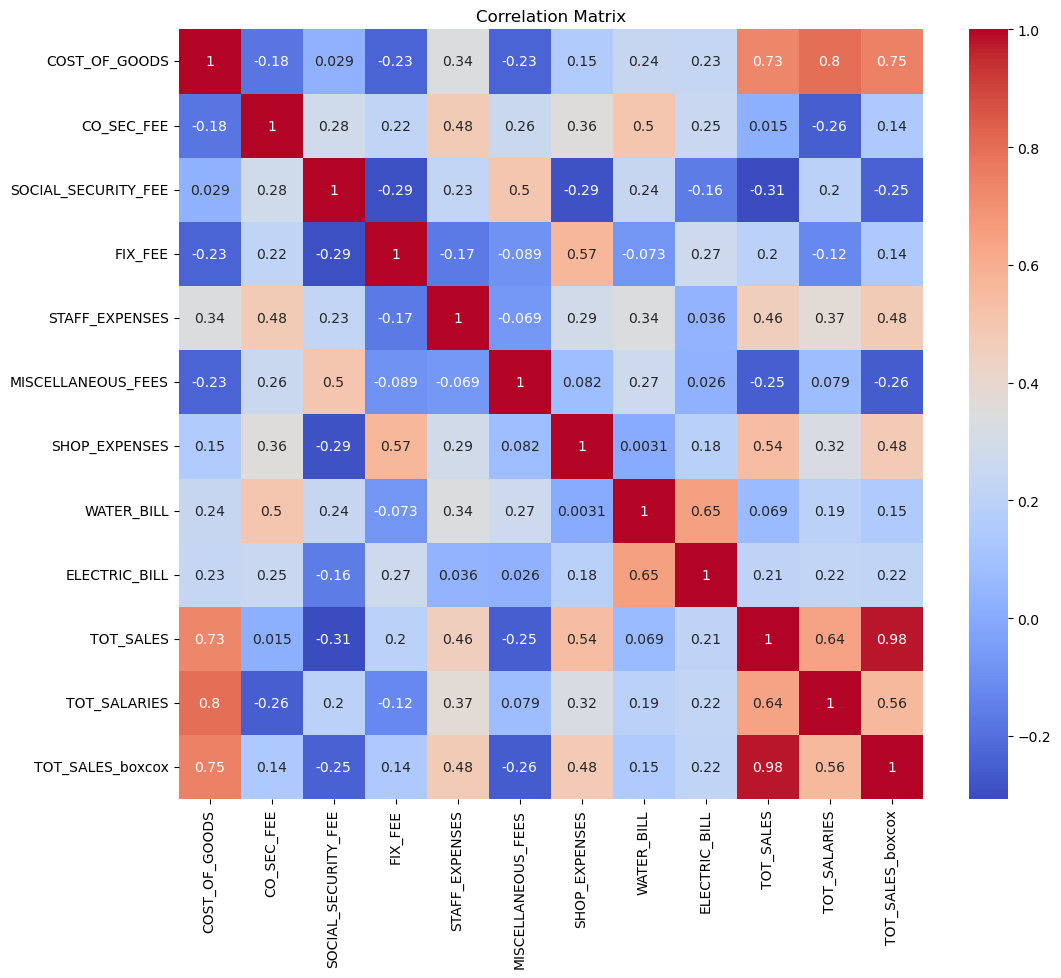

In [21]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data_kajang.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Simple Linear Regression

In [22]:
#define x and y
x_simple=data_kajang['COST_OF_GOODS'].values
y_simple=data_kajang['TOT_SALES'].values

In [23]:
print(x_simple)

[102292.25  77661.83  67209.67  57326.63  86389.11  82374.99  82480.81
  98727.42  71747.58  55285.75  70781.76  80394.97]


In [24]:
print(y_simple)

[218514.27 170946.06 163619.16 123552.66 196137.52 185358.14 199115.79
 189876.63 182787.28 178086.55 180311.34 211464.87]


In [25]:
#split dataset into training and testing 
x_simple_train, x_simple_test, y_simple_train, y_simple_test = train_test_split(x_simple, y_simple, test_size = 0.2, random_state = 42)

# train model
sl = LinearRegression()
sl.fit(x_simple_train.reshape(-1, 1), y_simple_train)

# Predict result
y_simple_pred = sl.predict(x_simple_test.reshape(-1, 1))
print(y_simple_pred)


[168030.03955054 142558.26446605 219825.83176299]


In [26]:
# Evaluate the model
r2_simple = r2_score(y_simple_test, y_simple_pred)
mse_simple = mean_squared_error(y_simple_test, y_simple_pred)
mae_simple = mean_absolute_error(y_simple_test, y_simple_pred)

print(f'R²: {r2_simple}')
print(f'MSE: {mse_simple}')
print(f'MAE: {mae_simple}')

R²: -0.3696945647808423
MSE: 471603202.6566823
MAE: 16373.715915468472


In [27]:
# Create a DataFrame with Actual and Predicted values
pred_y_data_kajang_simple = pd.DataFrame({'Actual Value': y_simple_test, 'Predicted Value': y_simple_pred})
pred_y_data_kajang_simple

,Actual Value,Predicted Value
0,180311.34,168030.039551
1,178086.55,142558.264466
2,218514.27,219825.831763


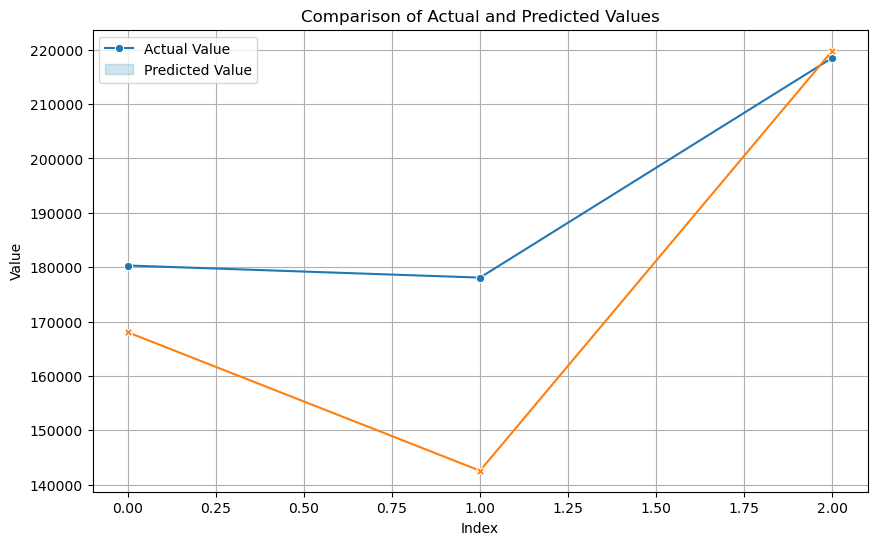

In [28]:
# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=pred_y_data_kajang_simple, markers=True, dashes=False)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(['Actual Value', 'Predicted Value'])
plt.grid(True)

plt.show()

In [29]:
# Randomly select 3 samples from x_test_simple
random_indices_simple = np.random.choice(len(x_simple_test), size=3, replace=False)
random_x_simple_test = x_simple_test[random_indices_simple]

# Repeat the selected samples 4 times to simulate data for the next 4 months
x_future_simple = np.tile(random_x_simple_test, (4, 1))

# Predict the sales for the next 4 months
y_simple_pred = sl.predict(x_future_simple.reshape(-1, 1))
y_simple_pred

array([219825.83176299, 168030.03955054, 142558.26446605, 219825.83176299,
       168030.03955054, 142558.26446605, 219825.83176299, 168030.03955054,
       142558.26446605, 219825.83176299, 168030.03955054, 142558.26446605])

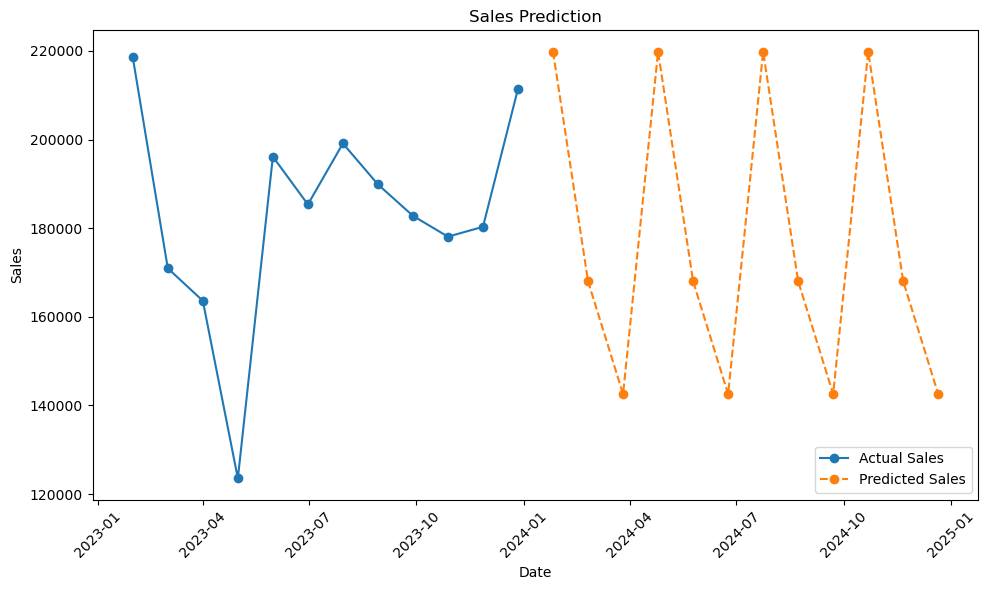

In [30]:
# Get the actual sales data
sales_simple = data_kajang['TOT_SALES'].values

# Create dates for the actual data (assuming the last day of each month)
start_date_simple = datetime(2023, 1, 31)
dates_simple = [start_date_simple + timedelta(days=30 * i) for i in range(len(sales_simple))]

# Create dates for the next 12 months
future_dates_simple = [dates_simple[-1] + timedelta(days=30 * i) for i in range(1, 13)]

# Plot the time series graph
plt.figure(figsize=(10, 6))
plt.plot(dates_simple, sales_simple, marker='o', label='Actual Sales')
plt.plot(future_dates_simple, y_simple_pred, marker='o', linestyle='dashed', label='Predicted Sales')

# Add labels and title
plt.title('Sales Prediction')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)  

# Show the plot
plt.tight_layout()
plt.show()

# Multiple Linear Regression 

In [31]:
#define x and y
x=data_kajang.drop(['TOT_SALES_boxcox'], axis=1).values
y=data_kajang['TOT_SALES_boxcox'].values

In [32]:
print(x)

[[102292.25        14103.66         1081.2         13627.82
    5451.25         1591.45        20763.77         1006.65
    6644.45       218514.27        34354.01      ]
 [ 77661.83        13962.11416667   1091.95        13262.29
    6866.2          1751.43        16197.16          918.35
    6526.1        170946.06        33442.94      ]
 [ 67209.67        13962.11416667   1156.45        14187.76055556
    2817.18         1986.31        24708.97          840.85
    5888.95       163619.16        33023.79083333]
 [ 57326.63        14103.66         1375.6         13372.21
    2948.5          1513.36         5013.77          892.13166667
    6054.3        123552.66        29522.91      ]
 [ 86389.11        13848.82         1360.35        12893.13
    7897.           1725.2         12460.39          829.55
    5608.4        196137.52        34677.08      ]
 [ 82374.99        13835.75         1274.95        13978.64
    2634.1          1659.83        14967.83          847.36263889
    652

In [33]:
print(y)

[3.83431302e+16 1.74763217e+16 1.51901158e+16 6.18243905e+15
 2.71346239e+16 2.26441044e+16 2.84754780e+16 2.44586062e+16
 2.16541936e+16 1.99218220e+16 2.07293552e+16 3.45229325e+16]


In [34]:
#split dataset into training and testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [35]:
# train model
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [36]:
# Predict result
y_pred = ml.predict(x_test)
print(y_pred)

[1.89080823e+16 2.45838626e+16 3.73979257e+16]


In [37]:
# Evaluete the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R²: {r2}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

R²: 0.8802980544339545
MSE: 8.648356126239248e+30
MAE: 2476172645876166.5


In [38]:
# Create a DataFrame with Actual and Predicted values
pred_y_data_kajang = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
pred_y_data_kajang

,Actual Value,Predicted Value
0,2.072936e+16,1.890808e+16
1,1.992182e+16,2.458386e+16
2,3.834313e+16,3.739793e+16


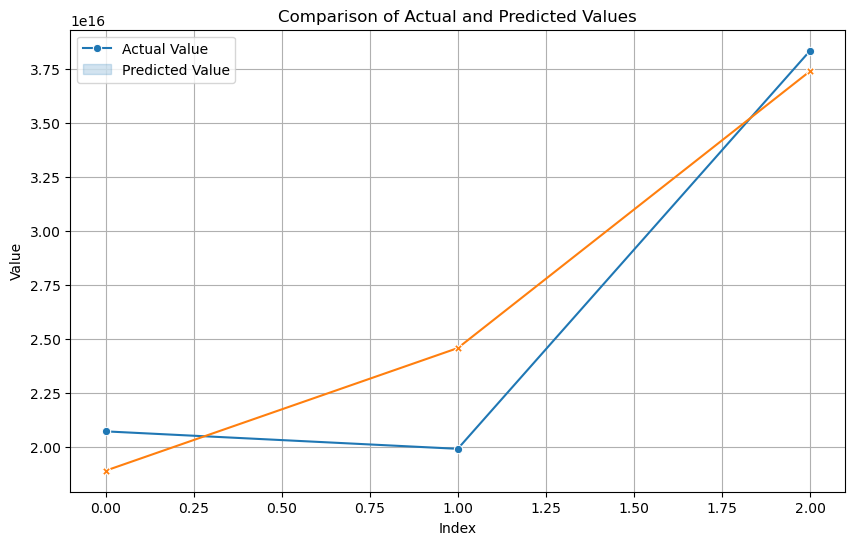

In [39]:
# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=pred_y_data_kajang, markers=True, dashes=False)
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(['Actual Value', 'Predicted Value'])
plt.grid(True)

plt.show()

In [40]:
# Randomly select 3 samples from x_test
random_indices = np.random.choice(len(x_test), size=3, replace=False)
random_x_test = x_test[random_indices]

# Repeat the selected samples 5 times to simulate data for the next 12 months
x_future = np.tile(random_x_test, (4, 1))

# Predict the sales for the next 12 months
y_pred_boxcox = ml.predict(x_future)
y_pred_boxcox

array([2.45838626e+16, 1.89080823e+16, 3.73979257e+16, 2.45838626e+16,
       1.89080823e+16, 3.73979257e+16, 2.45838626e+16, 1.89080823e+16,
       3.73979257e+16, 2.45838626e+16, 1.89080823e+16, 3.73979257e+16])

In [41]:
# Reverse the Box-Cox transformation
def inv_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y) - 1
    else:
        return (np.exp(np.log(lambda_ * y + 1) / lambda_)) - 1

y_pred = inv_boxcox(y_pred_boxcox, lambda_)
y_pred

array([190178.92212248, 175203.07139454, 216815.73345555, 190178.92212248,
       175203.07139454, 216815.73345555, 190178.92212248, 175203.07139454,
       216815.73345555, 190178.92212248, 175203.07139454, 216815.73345555])

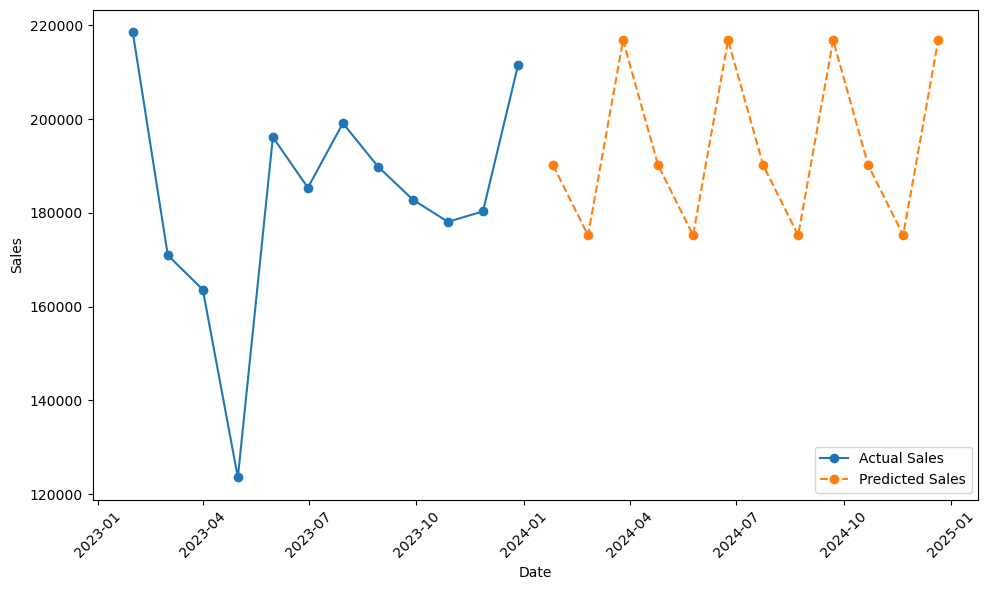

In [42]:
# Get the actual sales data
sales = data_kajang['TOT_SALES'].values

# Create dates for the actual data (assuming the last day of each month)
start_date = datetime(2023, 1, 31)
dates = [start_date + timedelta(days=30 * i) for i in range(len(sales))]

# Create dates for the next 12 months
future_dates = [dates[-1] + timedelta(days=30 * i) for i in range(1, 13)]

# Plot the time series graph
plt.figure(figsize=(10, 6))
plt.plot(dates, sales, marker='o', label='Actual Sales')
plt.plot(future_dates, y_pred, marker='o', linestyle='dashed', label='Predicted Sales')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()